# Back propagation

In [1]:
# cargo el dataset
lin <- read.csv("lineal.csv",header = F)

head(lin)


,V1,V2,V3
,<dbl>,<dbl>,<int>
1,0.272,0.987,0
2,0.506,0.371,1
3,0.526,0.900,0
4,0.932,0.968,1
5,0.369,0.938,0
6,0.524,0.196,1


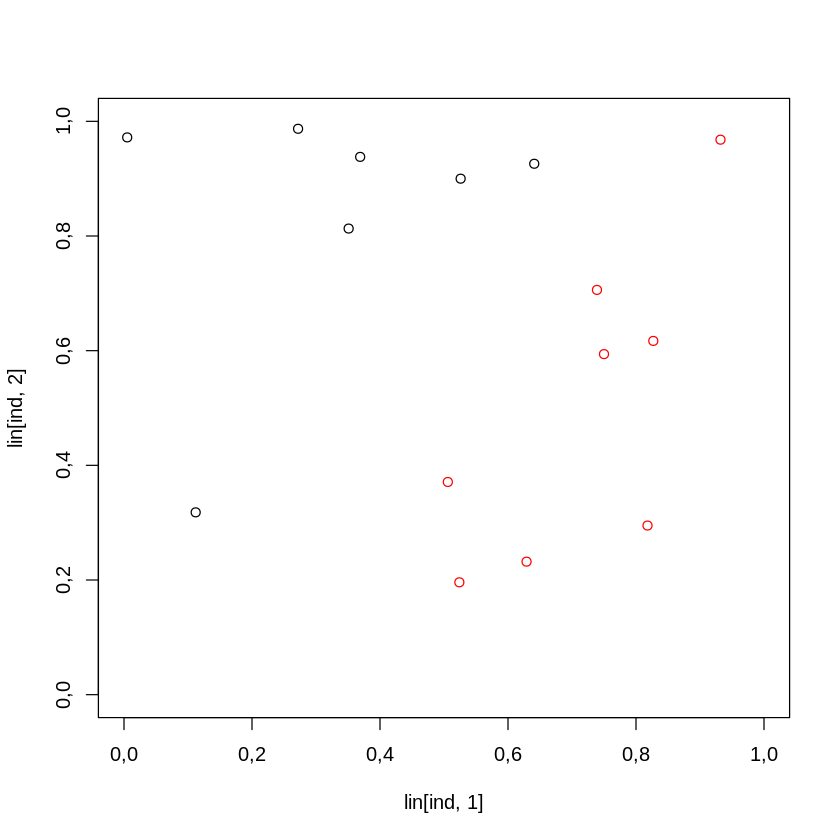

In [2]:
# Miro que pinta tiene
ind=which(lin[,3]==0)

plot(lin[ind,1],lin[ind,2],type="p",xlim=c(0,1),ylim=c(0,1))
lines(lin[-ind,1],lin[-ind,2],type="p",col="red")

In [3]:
# Creo una matriz 'a' con las features
a <- as.matrix(lin[,-3])
dim(a)

[1] 15  2

In [4]:
# Creo un vector 'b' con el valor de las dos clases
b <- as.matrix(lin[,3])
dim(b)

[1] 15  1

Es un problema de clasificación y tengo dos variables (features) de entrada:
- uso dos neuronas de entrada (una por cada variable);
- uso una neurona de salida, que me dá la probabilidad de ser de la clase 1 (con respecto a la clase 0).

In [5]:
# Incluyo el bias como una variable más, que siempre tiene valor 1
a <- cbind(a,rep(1,nrow(a)))

In [6]:
dim(a)

[1] 15  3

In [7]:
# Defino la función de activación (la sigmoide en este caso)
activation <- function(z) {
    1/(1 + exp(-z))
}

In [8]:
# defino las neuronas de entrada y de salida
neurons <- c(ncol(a),ncol(b))

# inicializo los pesos de manera aleatoria entre -1 y +1
W <- matrix(data = runif(prod(neurons), min = -1, max = 1),
    nrow = neurons[2], ncol = neurons[1])

In [9]:
# el output de la neurona es la función de activación aplicada 
#al producto escalar de los pesos por los valores de entreada
bout <- activation(a %*% t(W))

In [10]:
# el error es la diferencia entre la salida de la neurona y el valor observado
error <- b-bout

# voy construyendo el delta-W: aquí pongo el error por la derivada de la función
# de activación...
aux<- error*bout*(1-bout)

# ... y aquí multiplico ese valor por 'a' 
# (solo me falta decidir cuanto de grande va a ser el paso eta)
Wdelta <- t(aux)%*%a

In [108]:
# Defino aquí la función de back propagation

backprop <- function(x, y, epochs = 10, eta = 0.1) {
    
    # Inicializar matrices y listas
    errors <- c()
    x <- cbind(x, rep(1,nrow(x)))
    
    neurons <- c(ncol(x),ncol(y))

    Weights <- matrix(data = runif(prod(neurons), min = -1, max = 1),
    nrow = neurons[2], ncol = neurons[1])
    
    print("Prod neurons")
    print(prod(neurons))

    
    for (j in 1:epochs) {
        
        # Propagar hacia delante
        # y_out = b^ = f(B^)  
        y_out <- activation(x %*% t(Weights))
        
        # error = (b - b^)
        error <- y - y_out
        
        # aux = (b - b^) * f(B)(1 - f(B)) 
        aux <- error * y_out * (1 - y_out)
        
        # DeltaW = - eta * (aux*x)
        Wdelta <- t(aux) %*% x * eta
        
        # Actualizar pesos
        Weights <- Weights + Wdelta
        
        # Error output
        #print(paste("Error:", sum(error)))
        errors <- c(errors, sum(error**2))

}
### Return values
plot(errors)  
return(Weights)
}

[1] "Prod neurons"
[1] 3


V1,V2,
"5,937163","-4,383289","-0,2724538"


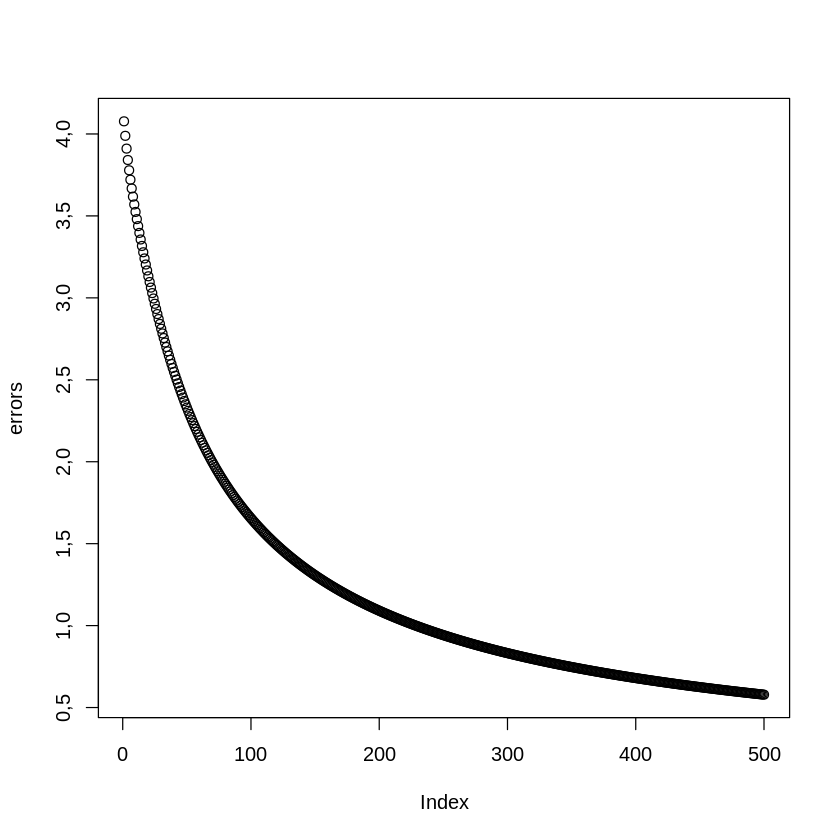

In [109]:
set.seed(1)

lin <- read.csv("lineal.csv",header = F)
a   <- as.matrix(lin[,-3])
b   <- as.matrix(lin[,3])

epochs <- 500

recta <- backprop(a, b, epochs = epochs, eta = 0.1)
recta

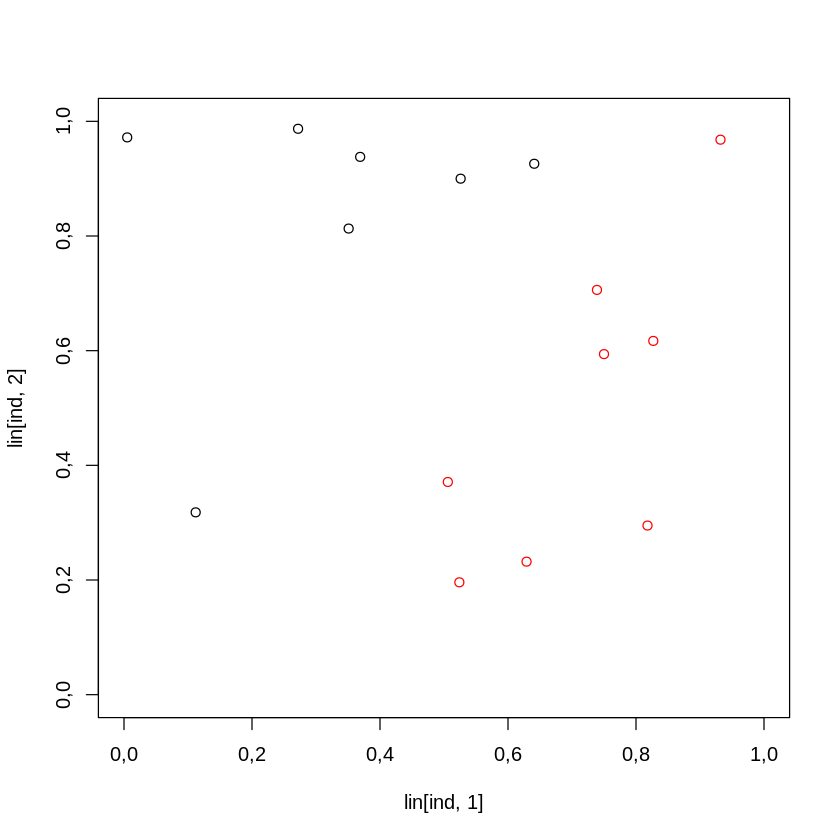

In [13]:
plot(lin[ind,1],lin[ind,2],type="p",xlim=c(0,1),ylim=c(0,1))
lines(lin[-ind,1],lin[-ind,2],type="p",col="red")
abline(recta[1]/recta[3], recta[2]/recta[3])

# Ahora con una capa oculta

In [110]:
# Defino aquí la función de back propagation

# h = numero de neuronas de la capa oculta
backprop <- function(x, y, epochs = 10, eta = 0.1, h = 2) {
    
    # Inicializar matrices y listas
    errors <- c()
    
    # Añado el bias a los valores de entrada
    x <- cbind(x, rep(1,nrow(x)))
    
    # numero de pesos de las x a la primera capa = ncol(x) * h
    neurons_1 <- c(ncol(x),h)
    # y ahora los pesos, con valores generados al azar
    Weights_1 <- matrix(data = runif(prod(neurons_1), min = -1, max = 1),
        nrow = neurons_1[2], 
        ncol = neurons_1[1])

    # numero de pesos de la primera capa a la salida = h * ncol(y)
    neurons_2 <- c(h,ncol(y))
    # y ahora los pesos, con valores generados al azar
    Weights_2 <- matrix(data = runif(prod(neurons_2), min = -1, max = 1),
        nrow = neurons_2[2], 
        ncol = neurons_2[1])
    
    for (j in 1:epochs) {
        
        # Defino las variables que necesito, propagando hacía adelante
        
        # y_out = b^ = f(B^)  
        h_1   <- activation(x   %*% t(Weights_1))
        y_out <- activation(h_1 %*% t(Weights_2))
        
        # error = (b - b^)
        error <- y - y_out
        
        # aux = (b - b^) * f(B)(1 - f(B)) 
        aux   <- error * y_out * (1 - y_out)
        
        # Cuando actualizo los pesos, empiezo por los de la capa oculta     
        #print("Dim x:") 
        #print(dim(x))
        #print("Dim aux:")
        #print(dim(aux))
        #print("Dim h1:")
        #print(dim(h_1))
        #print("Dim Weights 2:")
        #print(dim(Weights_2))
        #print("Dim Weights 1:")
        #print(dim(Weights_1))

        # Calculo los DeltaW
        # Para los pesos de capa oculta a salida: DeltaWeights_2 = - eta * (aux*h_1)
        Wdelta_2  <- t(aux) %*% h_1
        Weights_2 <- Weights_2 + eta * Wdelta_2
        
        # Para los pesos de entrada a capa oculta: DeltaWeights_1 = - eta * (aux*Weights_2*aux_2*x)
        aux_2 <- h_1 * (1 - h_1)
        
        #print("Dim aux 2:")
        #print(dim(aux_2))
        #print("Dim Wdelta 2:")
        #print(dim(Wdelta_2))
        #print("Dim t(x) %*% aux_2:")
        #print(dim(t(x) %*% aux_2))
        
        Wdelta_1  <- t((aux %*% Weights_2) * aux_2) %*% x
        Weights_1 <- Weights_1 + eta * Wdelta_1
        
        #print("dim Wdelta_1")
        #print(dim(Wdelta_1))
        
        
        # Error output
        # print(paste("Error:", sum(error)))
        errors <- c(errors, sum(error**2))
}
    
### Return values
plot(errors)  
    
Weights = list(Weights_1, Weights_2)    
return(Weights)
}

[[1]]
             V1        V2           
[1,] -4,5747823  3,343003  0,3063432
[2,] -2,1421238  1,949924 -0,3061253
[3,]  3,3708583 -2,081983 -0,4455462
[4,]  0,8241784  0,392683 -0,2023863
[5,]  1,9967387 -2,098749  0,4902527

[[2]]
          [,1]      [,2]     [,3]      [,4]     [,5]
[1,] -5,785343 -2,716664 4,231675 0,5660309 2,843993

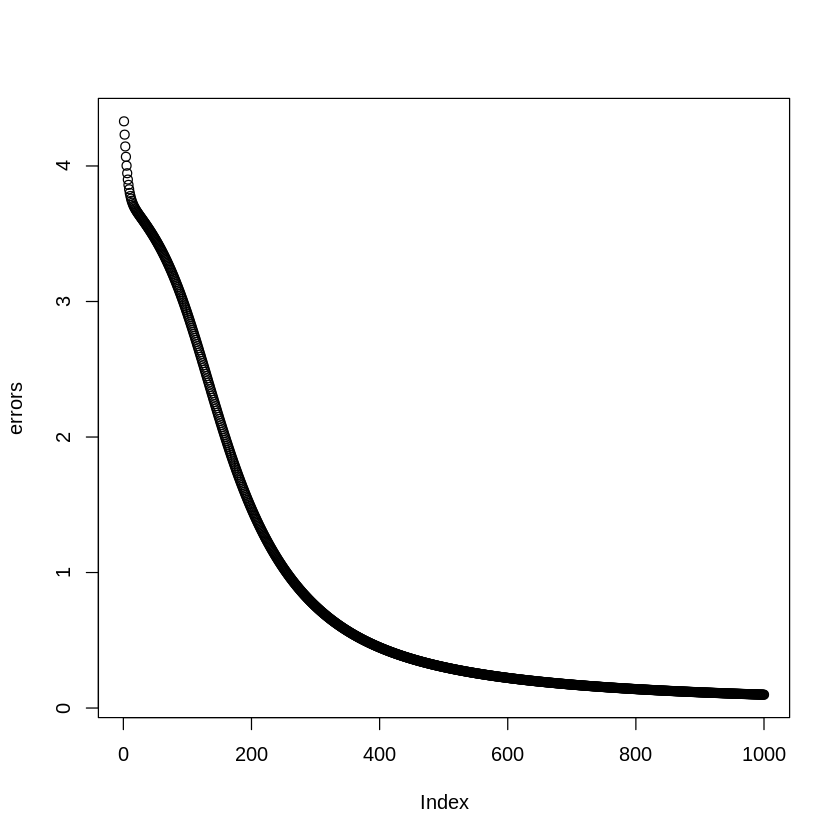

In [112]:
set.seed(1)

lin <- read.csv("lineal.csv",header = F)
a   <- as.matrix(lin[,-3])
b   <- as.matrix(lin[,3])

epochs <- 100

recta <- backprop(a, b, epochs = epochs, eta = 0.1, h = 5)
recta

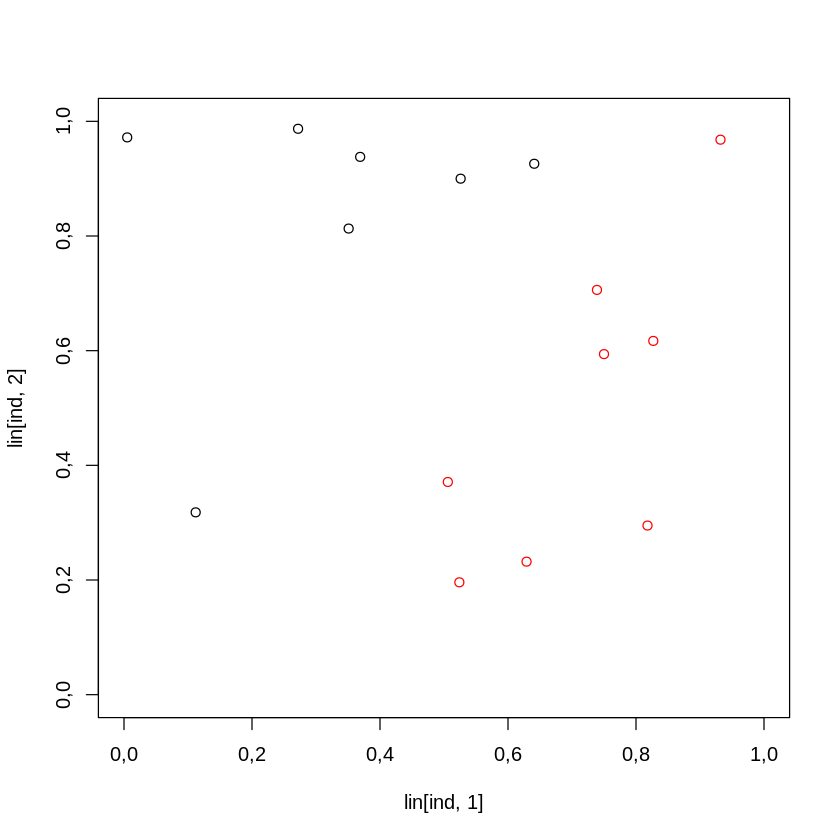

In [93]:
plot(lin[ind,1],lin[ind,2],type="p",xlim=c(0,1),ylim=c(0,1))
lines(lin[-ind,1],lin[-ind,2],type="p",col="red")
abline(recta[1], -recta[2])